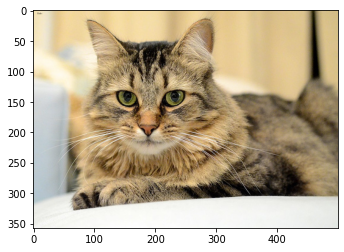

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from scipy import stats


#print jpg image using plt

img = plt.imread('images/Maine_Coon_100.jpg')
plt.imshow(img)

### Forward Process

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(357, 500, 3)
(357, 500, 3)


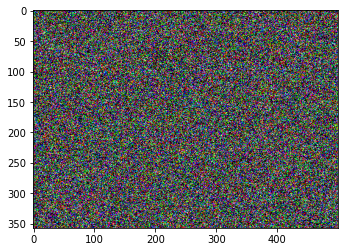

In [4]:
#sample from a distribution

mu, sigma = 0, 1

x_t = np.random.normal(mu, sigma, (357, 500, 3))

#print(x_t)
print(img.shape)
print(x_t.shape)
plt.imshow(x_t)


In [5]:
#scale image to [0,1]
def scale_img(img):
    return img/255.0

#measure correlation coeffecient between two images
def measure_correlation_coefficient(image1, image2):
    # Flatten the images into 1D arrays
    image1_flat = image1.flatten()
    image2_flat = image2.flatten()
    
    # Compute Pearson correlation coefficient
    correlation, _ = pearsonr(image1_flat, image2_flat)
    
    return correlation

#Test if data comes from normal distribution
def anderson_darling_test(image_array):
    # Convert to grayscale by averaging RGB channels
    gray_image = np.mean(image_array, axis=2)
    
    # Flatten the image into 1D array
    flattened_image = gray_image.flatten()
    
    # Normalize the pixel intensities (optional)
    mean = np.mean(flattened_image)
    std_dev = np.std(flattened_image)
    normalized_image = (flattened_image - mean) / std_dev
    
    # Perform Anderson-Darling test
    result = stats.anderson(normalized_image, dist='norm')
    
    # Interpretation
    interpretation = ""
    if result.statistic > result.critical_values[-1]:
        interpretation = "The null hypothesis can be rejected at all significance levels: data does not come from a normal distribution."
    elif result.statistic < result.critical_values[0]:
        interpretation = "The null hypothesis cannot be rejected at any significance level: data comes from a normal distribution."
    else:
        interpretation = "The null hypothesis can be rejected at some significance levels."
    
    return result, interpretation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

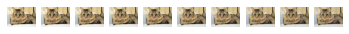

In [14]:

image = scale_img(img)

# Schedule
T = 100
beta_start = 0.003
beta_end = 0.1
linear_schedule = lambda t: beta_start + t * (beta_end - beta_start) / (T - 1)



def forward_diffusion(x_t_minus_1, t, schedule="linear"):
    if schedule == "linear":
        schedule = linear_schedule

    beta_t = schedule(t)
    #print("debug: beta_t = ", beta_t)
    mu = np.sqrt(1-beta_t)*x_t_minus_1
    noise = np.random.normal(0, np.sqrt(beta_t), (357, 500, 3))
    x_t = mu + noise
    
    return x_t
    
x_t = image
# print singe row of 10 images as t increases in forward diffusion (like in paper)
for t in range(10):
    x_t = forward_diffusion(x_t, t)
    plt.subplot(1, 10, t+1)
    plt.imshow(x_t)
    plt.axis('off')


    

In [7]:
#backwards diffusion

